In [1]:
import numpy as np
import pandas as pd

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

from sklearn.preprocessing import MinMaxScaler

def createNormalizedInput(origDataIndex):
    origData = cifar10Imgs[origDataIndex]
    allData = origData.flatten().astype('float64').reshape(-1, 1)
    normalizerModel = MinMaxScaler().fit(allData)
    normalizedData = normalizerModel.transform(allData)
    return {'normalizedData': normalizedData, 'preProcessModel': normalizerModel}

### Get all CIFAR-10 images

In [3]:
data = unpickle('resources/cifar10/cifar-10-batches-py/data_batch_1')

cifar10Imgs = data[b'data']
cifar10Imgs = cifar10Imgs.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

### Get all the labels and take 10 random images from each

In [4]:
np.random.seed(0)

picLabels = pd.Series(data[b'labels'])
picIDs = {_[0]: _[1].index.values for _ in picLabels.groupby(picLabels.values)}

In [5]:
chosenPics = {_:np.random.choice(picIDs[_], 10, replace=False) for _ in picIDs}
chosenPics

{0: array([7225, 6640, 2996, 3585, 5657, 9945,  344, 2345, 3066, 7747]),
 1: array([8107, 6737,  743,  873, 2280, 1320, 5433, 7312, 1421, 9478]),
 2: array([ 787, 8165, 4776, 5012, 5746, 2202, 9203, 8157, 2988, 6359]),
 3: array([5520, 6070, 5007, 5450, 5046, 4963, 1965, 8122, 6433, 4484]),
 4: array([7356, 6450, 6007, 4839,  484, 5788, 5193,  263, 1238, 1303]),
 5: array([7351,  183, 7742, 8847, 2579, 3616, 1198, 2722, 9688, 2305]),
 6: array([9847, 8956, 5740, 3873, 3861, 9753, 9103, 6297, 9901, 8002]),
 7: array([5254, 7372, 7682, 1908, 9958, 1679, 5317, 9310, 2331, 6077]),
 8: array([7580, 2929, 1289, 5777, 2464, 7051, 6086, 2441, 5251, 7646]),
 9: array([1505, 2644, 5388, 7114, 6129, 3652, 5397,   71,  884, 9683])}

In [6]:
picsToFit = [y for x in [list(_)for _ in chosenPics.values()] for y in x]

### Optional: *Just to visualize the CIFAR-10 images we are trying to reproduce*

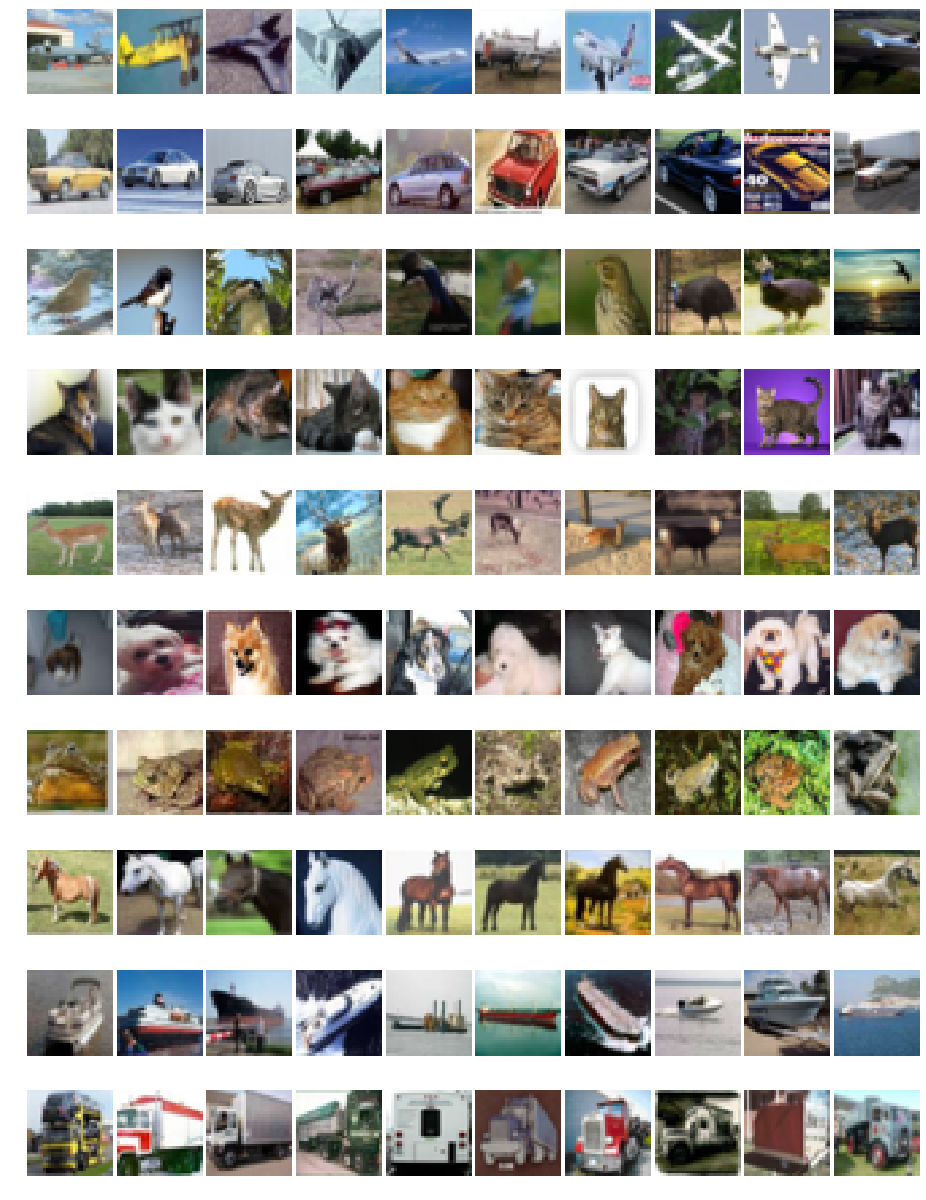

In [8]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

nrows, ncols = 10, 10

plt.figure(figsize = (16, 22))
gs1 = gridspec.GridSpec(nrows, ncols)
gs1.update(wspace=0.05, hspace=0.05)

for i in range(nrows * ncols):
    ax = plt.subplot(gs1[i])
    plt.axis('off')
    imgID = i % 20
    plt.imshow(cifar10Imgs[picsToFit[i]])

### Fit parameter to generate an existing image

Take an existing image from CIFAR-10 dataset and find the initial conditon $\alpha$ such that this image can be reproduced using the logistic decoder:

$$
\begin{equation}
f(x) = \sin^2 ( 2^{x\tau} \arcsin \sqrt \alpha )
\end{equation}
$$

where we choose a value $\tau$ which controls the accuracy of the generated image.

In [9]:
# set tau = 8

from helperFunctions import *

### Run algorithm for a single image

In [10]:
def runAlgo(origDataIndex):
    
    print('working on %d' % origDataIndex)
    print(datetime.datetime.now())
    
    normalizedData = createNormalizedInput(origDataIndex)
    trainData = normalizedData['normalizedData']
    
    decimalInitial = findInitialCondition(trainData)
    decodedValues = generateData(decimalInitial, len(trainData))
    
    decodedValues = normalizedData['preProcessModel'].inverse_transform(np.array(decodedValues).reshape(-1, 1))
    decodedValues = decodedValues.reshape(32, 32, 3).astype('uint8')
    
    return decimalInitial, decodedValues

### Go over randomly selected images that belong to a given class

In [11]:
def runClass(classID):
    return [runAlgo(_) for _ in chosenPics[classID]]

### Produce results for the 10 classes

In [12]:
results = list(map(runClass, range(10)))

working on 7225
2019-04-27 09:58:34.562651
significance = 24576 bits ; 7397 digits (base-10) ; ratio = 3.322

working on 6640
2019-04-27 09:59:27.175595
significance = 24576 bits ; 7397 digits (base-10) ; ratio = 3.322

working on 2996
2019-04-27 10:00:21.028977
significance = 24576 bits ; 7397 digits (base-10) ; ratio = 3.322

working on 3585
2019-04-27 10:01:15.917065
significance = 24576 bits ; 7397 digits (base-10) ; ratio = 3.322

working on 5657
2019-04-27 10:02:10.856207
significance = 24576 bits ; 7397 digits (base-10) ; ratio = 3.322

working on 9945
2019-04-27 10:03:05.206388
significance = 24576 bits ; 7397 digits (base-10) ; ratio = 3.322

working on 344
2019-04-27 10:04:02.103134
significance = 24576 bits ; 7397 digits (base-10) ; ratio = 3.322

working on 2345
2019-04-27 10:04:59.631846
significance = 24576 bits ; 7397 digits (base-10) ; ratio = 3.322

working on 3066
2019-04-27 10:05:53.470895
significance = 24576 bits ; 7397 digits (base-10) ; ratio = 3.322

working on 

working on 1679
2019-04-27 11:07:17.199868
significance = 24576 bits ; 7397 digits (base-10) ; ratio = 3.322

working on 5317
2019-04-27 11:08:12.071195
significance = 24576 bits ; 7397 digits (base-10) ; ratio = 3.322

working on 9310
2019-04-27 11:09:07.162728
significance = 24576 bits ; 7397 digits (base-10) ; ratio = 3.322

working on 2331
2019-04-27 11:10:02.512415
significance = 24576 bits ; 7397 digits (base-10) ; ratio = 3.322

working on 6077
2019-04-27 11:10:57.786835
significance = 24576 bits ; 7397 digits (base-10) ; ratio = 3.322

working on 7580
2019-04-27 11:11:52.612102
significance = 24576 bits ; 7397 digits (base-10) ; ratio = 3.322

working on 2929
2019-04-27 11:12:47.459270
significance = 24576 bits ; 7397 digits (base-10) ; ratio = 3.322

working on 1289
2019-04-27 11:13:42.751846
significance = 24576 bits ; 7397 digits (base-10) ; ratio = 3.322

working on 5777
2019-04-27 11:14:38.084254
significance = 24576 bits ; 7397 digits (base-10) ; ratio = 3.322

working on

In [13]:
import pickle
pickle.dump(results, open("resources/cifar10/results.p", "wb" ) )

### Plot the generated images

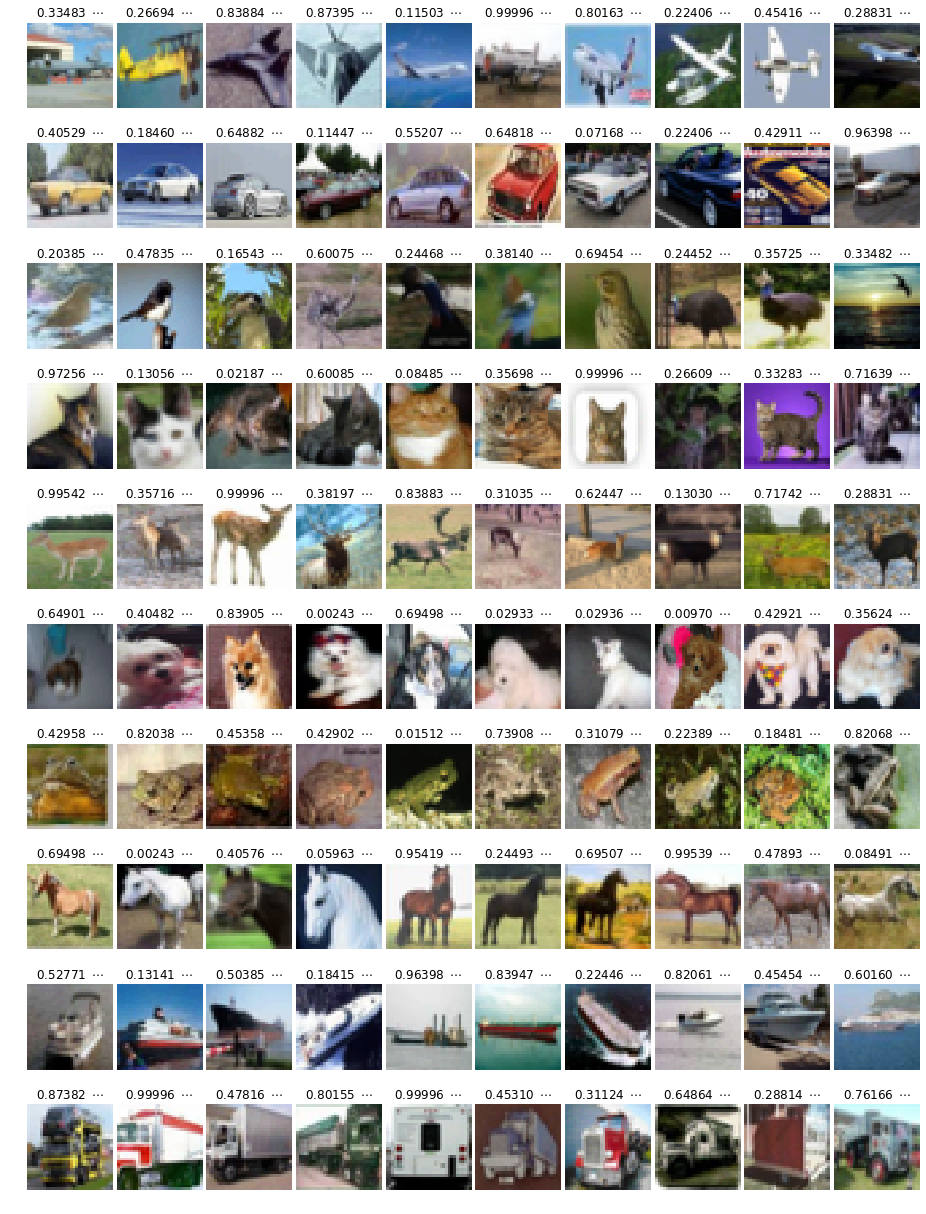

In [14]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import pyplot as mplot

resForPlot = [y for x in results for y in x]

nrows, ncols = 10, 10

plt.figure(figsize = (16, 22))
gs1 = gridspec.GridSpec(nrows, ncols)
gs1.update(wspace=0.05, hspace=0.05)

for imgID in range(nrows * ncols):
    ax = plt.subplot(gs1[imgID])
    plt.axis('off')
    plt.title(r'%.5f $\, \cdots$' % resForPlot[imgID][0])
    plt.imshow(resForPlot[imgID][1])
    
mplot.savefig('resources/cifar10/CIFAR10-generatedImgs.png', bbox_inches='tight')